### Data Science Job Salaries Dataset 

Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.


Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.


### Goal of the Notebook

Explore every feature in the dataset
 
Work Year Analysis(with Salary, Remote Ratio)
 
Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)

Company Location Analysis (with Experience Level)

Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)


In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt

In [2]:
pwd()

'C:\\Users\\HP ELITEBOOK\\Documents\\10Alytics - Data Science\\Python\\Files'

In [3]:
# importing the dataset

ds = pd.read_csv('C:\\Users\\HP ELITEBOOK\\Documents\\10Alytics - Data Science\\Python\\Data Science Job Salary Project\\ds_salaries.csv')


In [4]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
ds.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### Data Inspection and Manipulation

In [6]:
# display information about the dataset

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
# checking the shape of the data

ds.shape

(607, 12)

In [8]:
# check for missing values

ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<AxesSubplot:title={'center':'Missing Data'}>

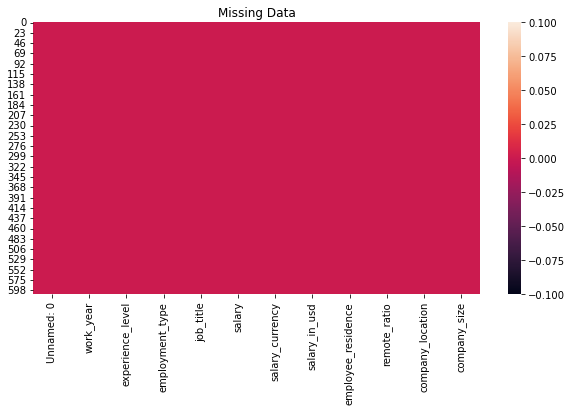

In [9]:
# visualise for missing values

plt.figure(figsize=(10,5))
plt.title('Missing Data')
sns.heatmap(ds.isnull())

### Observations 

- No missing Values

- Data has 607 rows and 12 columns

In [10]:
# Identify the columns in the dataset

ds.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [11]:
# descriptive statistics

ds.describe().astype('int')

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607,607
mean,303,2021,324000,112297,70
std,175,0,1544357,70957,40
min,0,2020,4000,2859,0
25%,151,2021,70000,62726,50
50%,303,2022,115000,101570,100
75%,454,2022,165000,150000,100
max,606,2022,30400000,600000,100


In [12]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# dropping the 'Unnamed: 0' column

df = ds.drop(columns = 'Unnamed: 0', axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
# Create a function  that labels 'Experience Level' column properly

def experience_bracket(experience_level):
    if experience_level == 'EN':
        return 'Entry level'
    elif experience_level == 'MI':
        return 'Junior Mid-level'
    elif experience_level == 'SE':
        return 'Senior Intermediate-level'
    elif experience_level == 'EX':
        return 'Executive Expert level'
    else:
        return 'Director'

In [16]:
# Create a new column for experience category
df['experience_category'] = df['experience_level'].apply(experience_bracket)

In [17]:
# Create a function  that labels 'Employment category' column properly

def employment_bracket(employment_type):
    if employment_type == 'PT':
        return 'Part time'
    elif employment_type == 'FT':
        return 'Full time'
    elif employment_type == 'CT':
        return 'Contract'
    else:
        return 'Freelance'

In [18]:
df['employment_category'] = df['employment_type'].apply(employment_bracket)

In [19]:
# Create a function  that labels 'Remote Ratio category' column properly

def remote_bracket(remote_ratio):
    if remote_ratio == 0:
        return 'No remote'
    elif remote_ratio == 50:
        return 'Partially remote'
    else:
        return 'Fully remote'

In [20]:
df['remote_category'] = df['remote_ratio'].apply(remote_bracket)

In [21]:
# Create a function  that labels 'Company Size category' column properly

def company_size_bracket(company_size):
    if company_size == 'S':
        return 'Small'
    elif company_size == 'M':
        return 'Medium'
    else:
        return 'Large'

In [22]:
df['company_size_category'] = df['company_size'].apply(company_size_bracket)

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Junior Mid-level,Full time,No remote,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Senior Intermediate-level,Full time,No remote,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Senior Intermediate-level,Full time,Partially remote,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Junior Mid-level,Full time,No remote,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Senior Intermediate-level,Full time,Partially remote,Large


In [24]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,employment_category,remote_category,company_size_category
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Senior Intermediate-level,Full time,Fully remote,Medium
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Senior Intermediate-level,Full time,Fully remote,Medium
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Senior Intermediate-level,Full time,No remote,Medium
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Senior Intermediate-level,Full time,Fully remote,Medium
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,Junior Mid-level,Full time,Fully remote,Large


In [25]:
# dropping old name columns

df.drop(df.columns[[1, 2, 8, 10]], axis = 1)

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,experience_category,employment_category,remote_category,company_size_category
0,2020,Data Scientist,70000,EUR,79833,DE,DE,Junior Mid-level,Full time,No remote,Large
1,2020,Machine Learning Scientist,260000,USD,260000,JP,JP,Senior Intermediate-level,Full time,No remote,Small
2,2020,Big Data Engineer,85000,GBP,109024,GB,GB,Senior Intermediate-level,Full time,Partially remote,Medium
3,2020,Product Data Analyst,20000,USD,20000,HN,HN,Junior Mid-level,Full time,No remote,Small
4,2020,Machine Learning Engineer,150000,USD,150000,US,US,Senior Intermediate-level,Full time,Partially remote,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,154000,USD,154000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium
603,2022,Data Engineer,126000,USD,126000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium
604,2022,Data Analyst,129000,USD,129000,US,US,Senior Intermediate-level,Full time,No remote,Medium
605,2022,Data Analyst,150000,USD,150000,US,US,Senior Intermediate-level,Full time,Fully remote,Medium


In [26]:
# checking the data shape
df.shape

(607, 15)

### UNIVARIATE ANALYSIS

In [27]:
df.experience_category.value_counts()

Senior Intermediate-level    280
Junior Mid-level             213
Entry level                   88
Executive Expert level        26
Name: experience_category, dtype: int64

Text(0, 0.5, 'Count of Experience_Category')

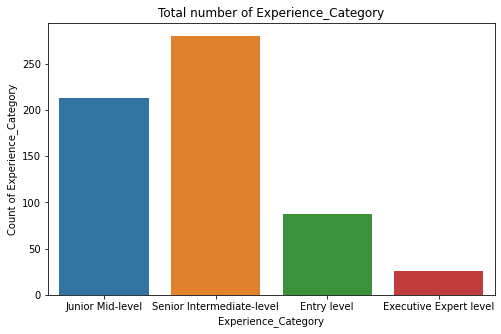

In [28]:
# Visualize Experience_Category

plt.figure(figsize=(8,5))
sns.countplot(x=df['experience_category'])
plt.title('Total number of Experience_Category')
plt.xlabel('Experience_Category')
plt.ylabel("Count of Experience_Category")

- Companies have more Senior Intermediate-level talent, followed by Junior Mid-level talent and Entry level.
- Executive Expert Level is the least Employed.

In [29]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

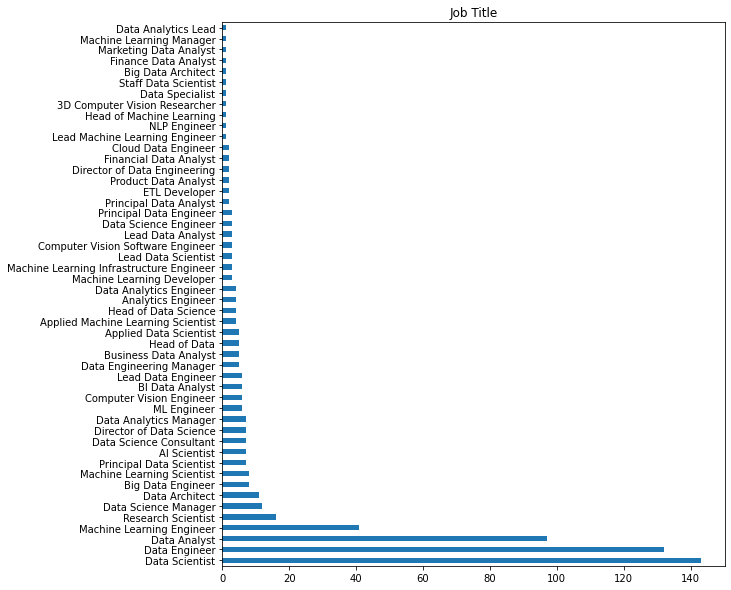

In [30]:
# Visualize job_titles

plt.figure(figsize=(9,10))
df.job_title.value_counts().plot.barh()
plt.title('Job Title')
plt.show()

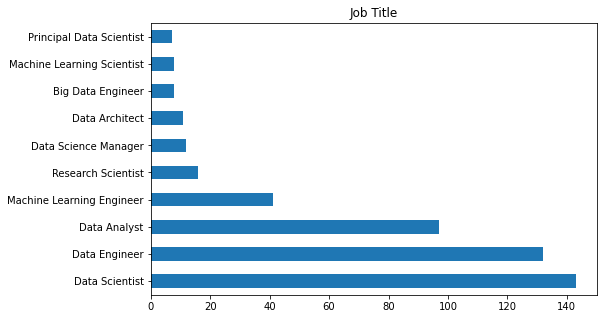

In [31]:
# Visualize job_title top 10

plt.figure(figsize=(8,5))
df.job_title.value_counts()[:10].plot.barh()
plt.title('Job Title')
plt.show()

 - Data shows we have multiple job titles all pointing to the same field of Data Science. However, more titles carry the name Data Scientist, Data Analyst, Data Engineer and Machine Learning Engineer.
 

In [32]:
df.employment_category.value_counts()

Full time    588
Part time     10
Contract       5
Freelance      4
Name: employment_category, dtype: int64

Text(0, 0.5, 'Count of Employment_Type')

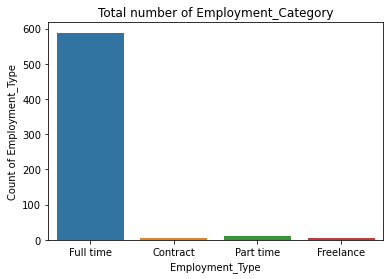

In [33]:
# Visualize employment_category(Type)

sns.countplot(x=df['employment_category'])
plt.title('Total number of Employment_Category')
plt.xlabel('Employment_Type')
plt.ylabel("Count of Employment_Type")

More Employment are on a Full time basis. Followed by Part time and Freelance.

In [34]:
df.company_size_category.value_counts()

Medium    326
Large     198
Small      83
Name: company_size_category, dtype: int64

Text(0, 0.5, 'Count of Company Category')

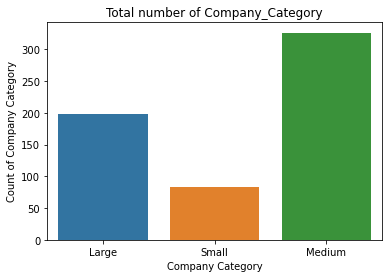

In [35]:
# Visualize Company Size_category

sns.countplot(x=df['company_size_category'])
plt.title('Total number of Company_Category')
plt.xlabel('Company Category')
plt.ylabel("Count of Company Category")

From the data, medium scaled companies category was the highest for by the Large scaled companies. 



In [36]:
df.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

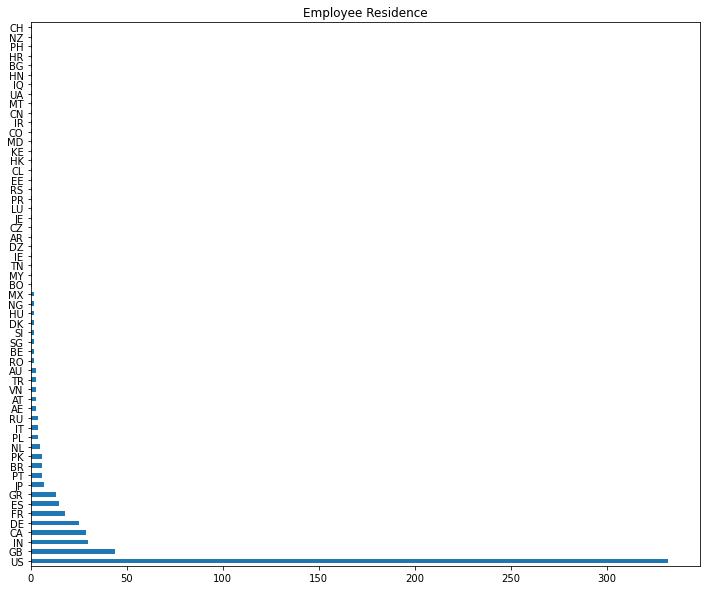

In [37]:
# Visualize Employee Residence

plt.figure(figsize=(12,10))
df.employee_residence.value_counts().plot.barh()
plt.title('Employee Residence')
plt.show()

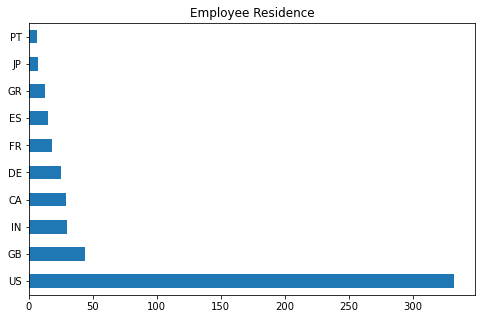

In [38]:
# Visualize Employee Residence - Top 10

plt.figure(figsize=(8,5))
df.employee_residence.value_counts()[:10].plot.barh()
plt.title('Employee Residence')
plt.show()

Most employees where resident in the USA, Great Britain and India.

In [39]:
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Text(0, 0.5, 'Count of Work Year')

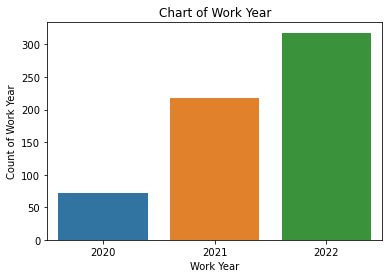

In [40]:
# Visualize Company Size_category

sns.countplot(x=df['work_year'])
plt.title('Chart of Work Year')
plt.xlabel('Work Year')
plt.ylabel("Count of Work Year")

Data indicates 2022 to be the highest Work Year

In [41]:
df.salary_in_usd.value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

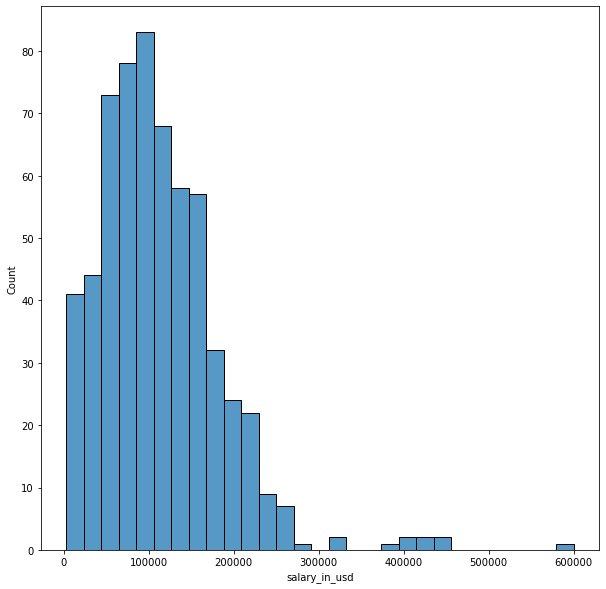

In [42]:
# Visualize Salary_in_usd

fig, axes = plt.subplots(figsize = (10, 10))
sns.histplot(x='salary_in_usd', data=df)

From the data, not more than 2 employees were paid more than 600k usd. However, the most salary in usd ranged between 80k to 150k usd

In [43]:
df.remote_category.value_counts()

Fully remote        381
No remote           127
Partially remote     99
Name: remote_category, dtype: int64

Text(0, 0.5, 'Count of Remote Category')

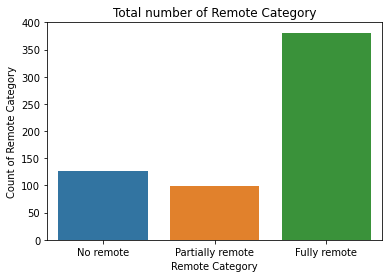

In [44]:
# Visualize Remote Category (Ratio)

sns.countplot(x=df['remote_category'])
plt.title('Total number of Remote Category')
plt.xlabel('Remote Category')
plt.ylabel("Count of Remote Category")

<AxesSubplot:title={'center':'Remote Category'}, ylabel='remote_category'>

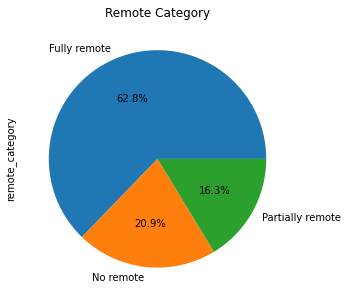

In [45]:
# create visualization

plt.figure(figsize = (10,5))
plt.title ("Remote Category")
df['remote_category'].value_counts().plot.pie(autopct='%1.1f%%')

Most jobs were fully remote. 

Fully remote work accounted for 62.8% of the Remote ratio while partially remove was 16.3%. No remote accounted for 20.9%

## Bivariate Analysis

### Work Year Analysis

Text(0, 0.5, 'Remote Category')

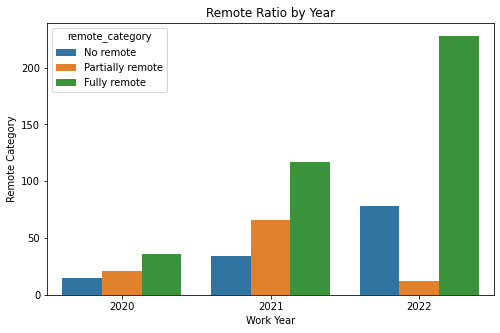

In [46]:
# Remote Ratio by Year

plt.figure(figsize=(8,5))
plt.title('Remote Ratio by Year')
sns.countplot(x='work_year', data=df, hue='remote_category')
plt.xlabel('Work Year')
plt.ylabel('Remote Category')

Over the years we can see the growth of fully remote work which however has risen astronomically in 2022
Most employers have tilted towards work from home for the data scientist.

### Experience Level Analysis

Text(0, 0.5, 'Experience Level')

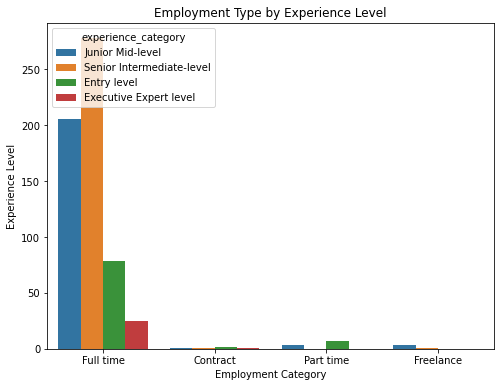

In [47]:
# Employment Type by Experience level

plt.figure(figsize=(8,6))
plt.title('Employment Type by Experience Level')
sns.countplot(x='employment_category', data=df, hue='experience_category')
plt.xlabel('Employment Category')
plt.ylabel('Experience Level')

Most fulltime employment have Senior Intermediate level experience, followed by Junior Mid-level experience.
The Freelance category are also characterized majorly by Junior Mid level experience and Senior intermediate level

This signifies that most of the experinced data scientist are on full time employment

In [48]:
# Top 3 Job Title by Experience Level

df.job_title.value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [49]:
df.experience_category.value_counts()

Senior Intermediate-level    280
Junior Mid-level             213
Entry level                   88
Executive Expert level        26
Name: experience_category, dtype: int64

<AxesSubplot:title={'center':'Top 3 Job Title by Experience Level'}, ylabel='experience_category'>

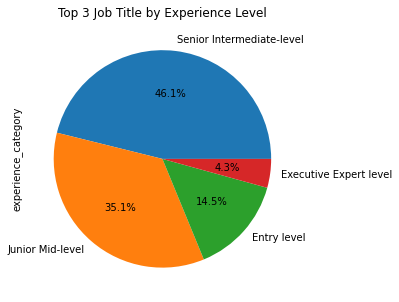

In [50]:
# create visualization

plt.figure(figsize = (10,5))
plt.title ("Top 3 Job Title by Experience Level")
df['experience_category'].value_counts().plot.pie(autopct='%1.1f%%')

Text(0, 0.5, 'Experience Level')

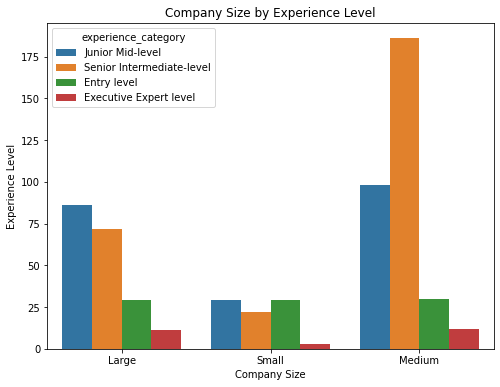

In [51]:
# Company Size by Experience Level

plt.figure(figsize=(8,6))
plt.title('Company Size by Experience Level')
sns.countplot(x='company_size_category', data=df, hue='experience_category')
plt.xlabel('Company Size')
plt.ylabel('Experience Level')

We can see that the Medium sized company has more Senior Intermediate level when compared to Large companies.
Large companies on the other hand have more Junior Mid level Experience than Senior Intermediate Level.
Both large and medium companies have more executive expert level experience than small companies


### Company Location Analysis

In [52]:
# Experience Level

df.company_location.value_counts()[:10]

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

Text(0.5, 1.0, 'Company Location')

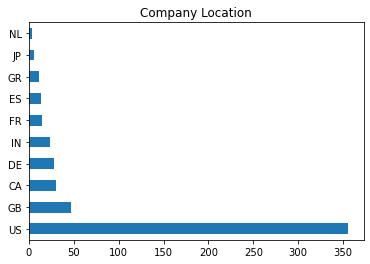

In [53]:
df.company_location.value_counts()[:10].plot.barh()
plt.title('Company Location')

Most companies are located in the US followed by Great Britain and Canada

### Salary Analysis

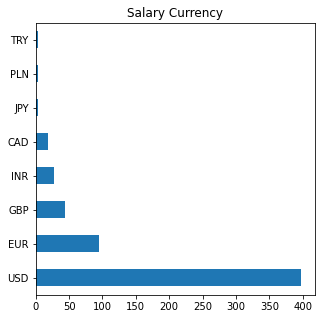

In [54]:
# Visualize Salary Currency

plt.figure(figsize=(5,5))
df.salary_currency.value_counts()[:8].plot.barh()
plt.title('Salary Currency')
plt.show()

Most salaries where paid in USD followed by Euros and GBP

In [55]:
# Salary by Work Year

salary_work_year =  df.groupby('work_year')['salary'].sum().astype(int) 
salary_work_year

work_year
2020     27531809
2021    118628993
2022     50507236
Name: salary, dtype: int32

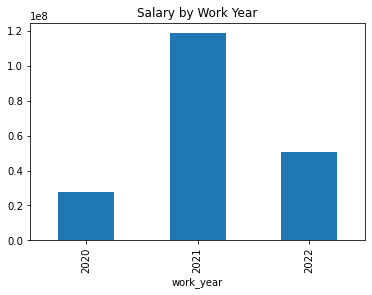

In [56]:
salary_work_year.plot(kind='bar')
plt.title('Salary by Work Year')
plt.show()

From the data above, more salaries were paid in 2021 than any other year

In [57]:
# Salary by Experience Level

salary_experience_level =  df.groupby('experience_category')['salary'].sum().astype(int) 
salary_experience_level



experience_category
Entry level                   23286776
Executive Expert level        11103875
Junior Mid-level             102371568
Senior Intermediate-level     59905819
Name: salary, dtype: int32

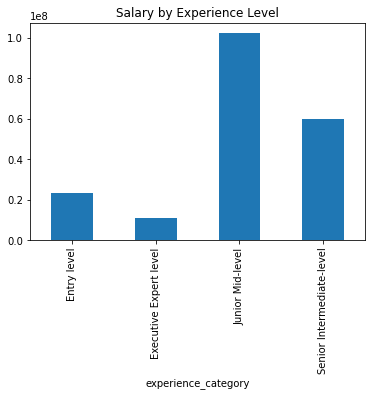

In [58]:
salary_experience_level.plot(kind='bar')
plt.title('Salary by Experience Level')
plt.show()


Based on experience level, Junior Mid Level received the higher salaries followed by Senior Intermediate level
Entry level also receivde more salaries than Executive experts but this could be as a result of companies having more Entry level than Expert level staff.

In [59]:
# Salary by Company Size

scs = df.groupby('company_size_category')['salary'].sum().astype(int) 
scs

company_size_category
Large     117551772
Medium     47766335
Small      31349931
Name: salary, dtype: int32

Text(0.5, 1.0, 'Salary by Company Size')

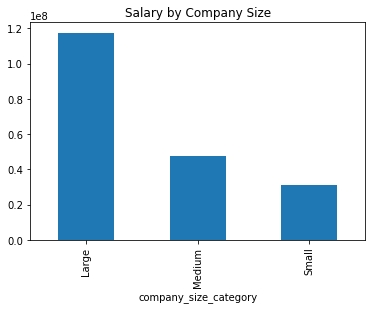

In [60]:
scs.plot(kind='bar')
plt.title('Salary by Company Size')

Large Companies paid the highest salaries followed by Medium companies. Small companies paid the least in terms of salaries

In [61]:
# Highest Salaries by Job Title

HSJT = df.groupby('job_title')['salary'].sum().astype(int).sort_values(ascending=False)[:10]
HSJT

job_title
Data Scientist               72693650
Data Engineer                23655793
ML Engineer                  16060000
Data Science Manager         12751183
BI Data Analyst              11412272
Machine Learning Engineer    11181433
Data Analyst                  9370681
Head of Machine Learning      6000000
Big Data Engineer             3640000
Lead Data Scientist           3305000
Name: salary, dtype: int32

Text(0.5, 1.0, 'Salary by Job Title')

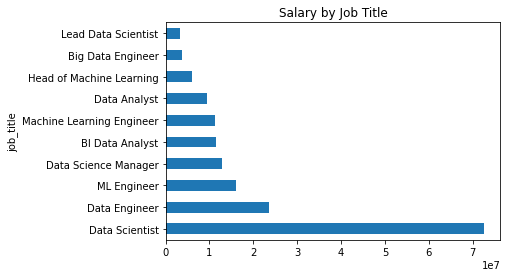

In [62]:
HSJT.plot.barh()
plt.title('Salary by Job Title')

Data Scientist are paid the highest salaries, followed by Data Engineer and Machine Learning Enginer

In [63]:
# Salary by Company Location

SCL = df.groupby('company_location')['salary'].sum().astype(int).sort_values(ascending=False)[:10]
SCL

company_location
US    66639171
IN    49564997
CL    30400000
JP    20452000
HU    11000000
CA     3459200
GB     2927856
DE     1996119
AS     1335000
FR      853220
Name: salary, dtype: int32

Text(0.5, 1.0, 'Salary by Company Location')

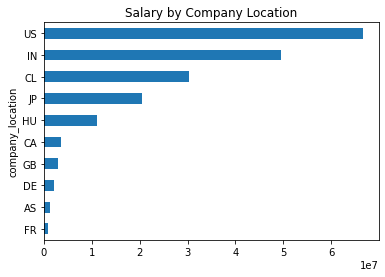

In [64]:
SCL.sort_values().plot.barh()
plt.title('Salary by Company Location')

The US had the location by company location meaning that Data Scientist are in high demand in the US.

In [65]:
# Average Salary by Company Location

ASCL = df.groupby('company_location')['salary'].mean().astype(int).sort_values(ascending=False)[:10]
ASCL

company_location
CL    30400000
HU    11000000
JP     3408666
IN     2065208
AS     1335000
MX      279333
CH      275000
CN      199500
US      187715
DK      185000
Name: salary, dtype: int32

Text(0.5, 1.0, 'Average Salary by Company Location')

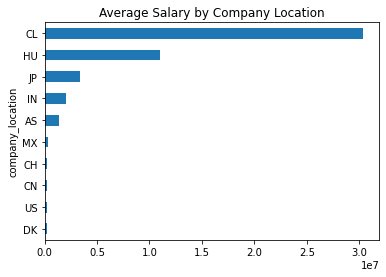

In [66]:
ASCL.sort_values().plot.barh()
plt.title('Average Salary by Company Location')

In terms of average salary by company location, Chile has the higgest average salary followed by Hungary